<a href="https://colab.research.google.com/github/jamiroquai1225/visualization-toolkit/blob/main/Jeju_Port_Graph_Script.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 터미널 혹은 노트북에서 설치
!pip install pandas openpyxl matplotlib seaborn

입항 컬럼명: ['구분', '합계', '모래', '유류', '시멘트', '비료', '자갈', '철재', '기타']
출항 컬럼명: ['구분', '합계', '감귤채소', '기타']


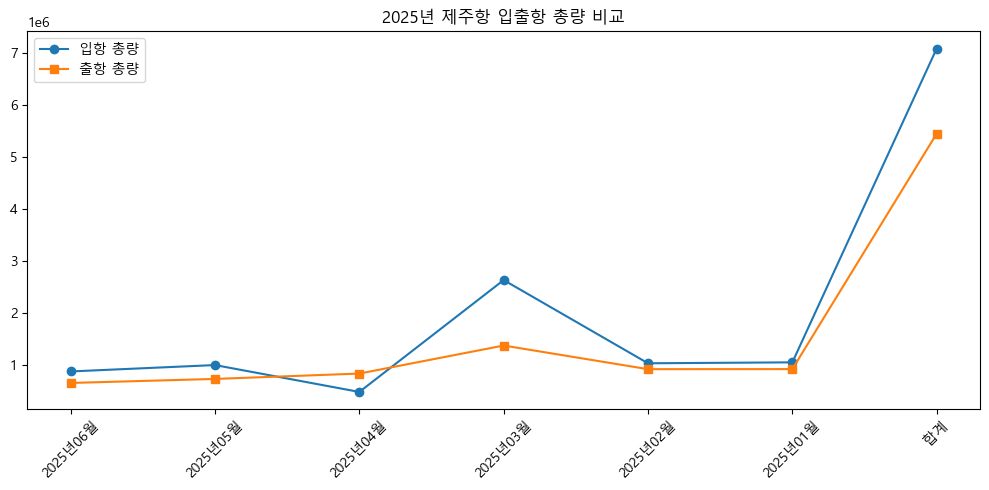

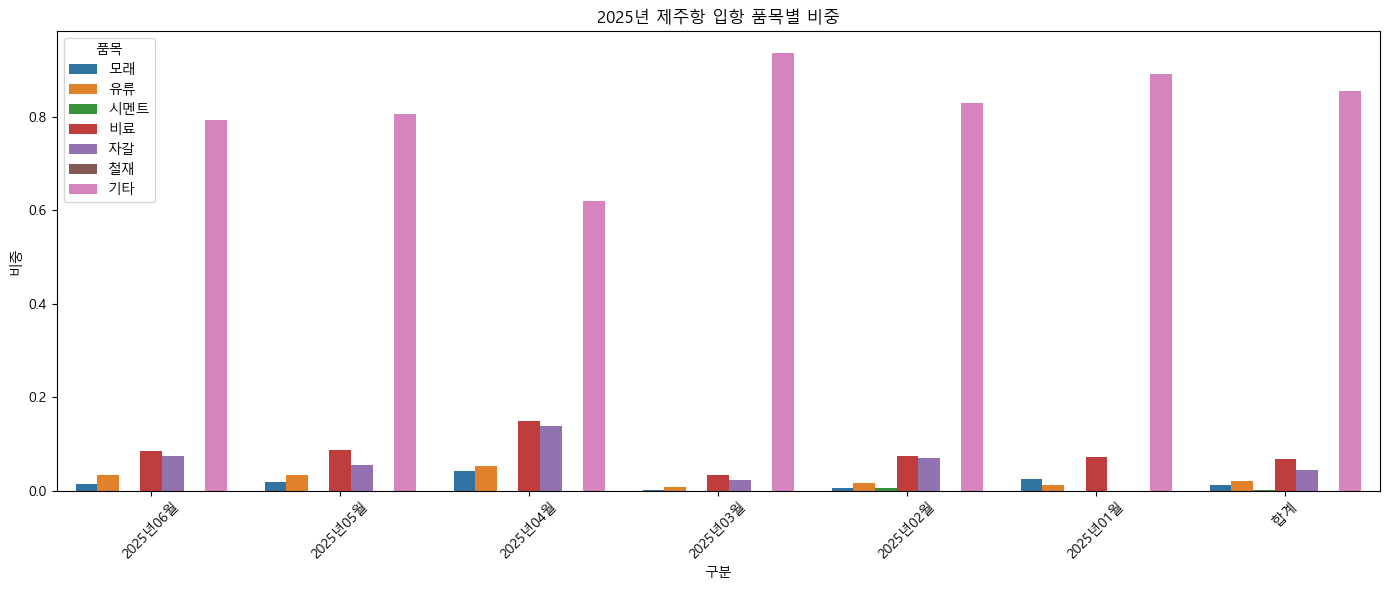

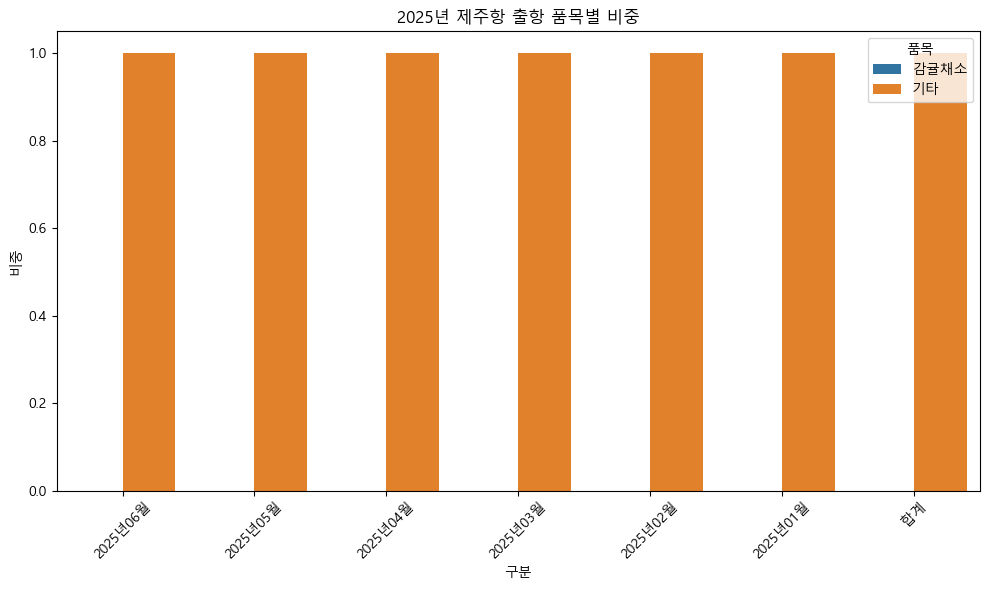

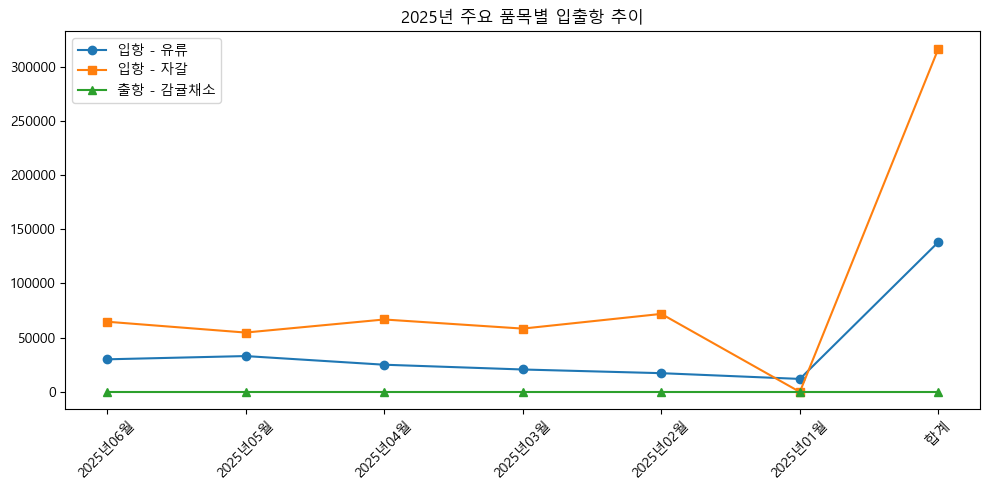

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# ▶ 한글 폰트 설정
matplotlib.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# ▶ 파일 경로
arrival_path = r"C:\Users\DAEJIN\Desktop\제주도의회 공모전\데이터\(2025) 제주항 품목별 입항 물동량.xlsx"
departure_path = r"C:\Users\DAEJIN\Desktop\제주도의회 공모전\데이터\(2025) 제주항 품목별 출항 물동량.xlsx"

# ▶ 엑셀 불러오기 (header=None으로 전 행 다 불러오기)
arr_raw = pd.read_excel(arrival_path, sheet_name=0, header=None)
dep_raw = pd.read_excel(departure_path, sheet_name=0, header=None)

# ✅ 정확한 컬럼명 설정: 2번째 인덱스 (즉, 3번째 행)
arr_raw.columns = arr_raw.iloc[2].astype(str).str.strip()
dep_raw.columns = dep_raw.iloc[2].astype(str).str.strip()

# ✅ 실제 데이터는 3번째 인덱스부터 시작
arr_df = arr_raw.iloc[3:].reset_index(drop=True)
dep_df = dep_raw.iloc[3:].reset_index(drop=True)

# ▶ 컬럼명 확인 (중요!)
print("입항 컬럼명:", arr_df.columns.tolist())
print("출항 컬럼명:", dep_df.columns.tolist())

# ▶ 분석에 사용할 컬럼 정의
arrival_items = ['모래', '유류', '시멘트', '비료', '자갈', '철재', '기타']
departure_items = ['감귤채소', '기타']

arrival_cols = ['구분'] + [col for col in arrival_items if col in arr_df.columns]
departure_cols = ['구분'] + [col for col in departure_items if col in dep_df.columns]

# ▶ 필요한 컬럼만 필터링
arr_df = arr_df[arrival_cols].copy()
dep_df = dep_df[departure_cols].copy()

# ▶ 숫자형 변환
for col in arrival_cols[1:]:
    arr_df[col] = pd.to_numeric(arr_df[col], errors='coerce')
for col in departure_cols[1:]:
    dep_df[col] = pd.to_numeric(dep_df[col], errors='coerce')

# ▶ 총합 계산
arr_df['합계'] = arr_df[arrival_cols[1:]].sum(axis=1)
dep_df['합계'] = dep_df[departure_cols[1:]].sum(axis=1)

# ▶ ① 입출항 총량 비교
plt.figure(figsize=(10,5))
plt.plot(arr_df['구분'], arr_df['합계'], label='입항 총량', marker='o')
plt.plot(dep_df['구분'], dep_df['합계'], label='출항 총량', marker='s')
plt.title('2025년 제주항 입출항 총량 비교')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# ▶ ② 입항 품목별 비중
arr_ratio = arr_df.copy()
arr_ratio[arrival_cols[1:]] = arr_ratio[arrival_cols[1:]].div(arr_ratio[arrival_cols[1:]].sum(axis=1), axis=0)
arr_melt = arr_ratio.melt(id_vars='구분', value_vars=arrival_cols[1:], var_name='품목', value_name='비중')

plt.figure(figsize=(14, 6))
sns.barplot(data=arr_melt, x='구분', y='비중', hue='품목')
plt.title('2025년 제주항 입항 품목별 비중')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ▶ ③ 출항 품목별 비중
dep_ratio = dep_df.copy()
dep_ratio[departure_cols[1:]] = dep_ratio[departure_cols[1:]].div(dep_ratio[departure_cols[1:]].sum(axis=1), axis=0)
dep_melt = dep_ratio.melt(id_vars='구분', value_vars=departure_cols[1:], var_name='품목', value_name='비중')

plt.figure(figsize=(10, 6))
sns.barplot(data=dep_melt, x='구분', y='비중', hue='품목')
plt.title('2025년 제주항 출항 품목별 비중')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ▶ ④ 주요 품목별 추이
plt.figure(figsize=(10,5))
if '유류' in arr_df.columns:
    plt.plot(arr_df['구분'], arr_df['유류'], label='입항 - 유류', marker='o')
if '자갈' in arr_df.columns:
    plt.plot(arr_df['구분'], arr_df['자갈'], label='입항 - 자갈', marker='s')
if '감귤채소' in dep_df.columns:
    plt.plot(dep_df['구분'], dep_df['감귤채소'], label='출항 - 감귤채소', marker='^')

plt.title('2025년 주요 품목별 입출항 추이')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


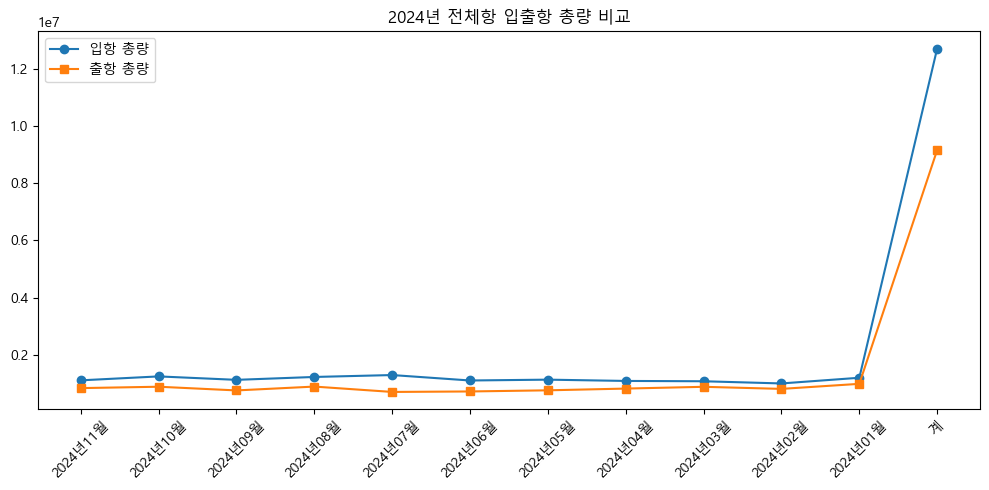

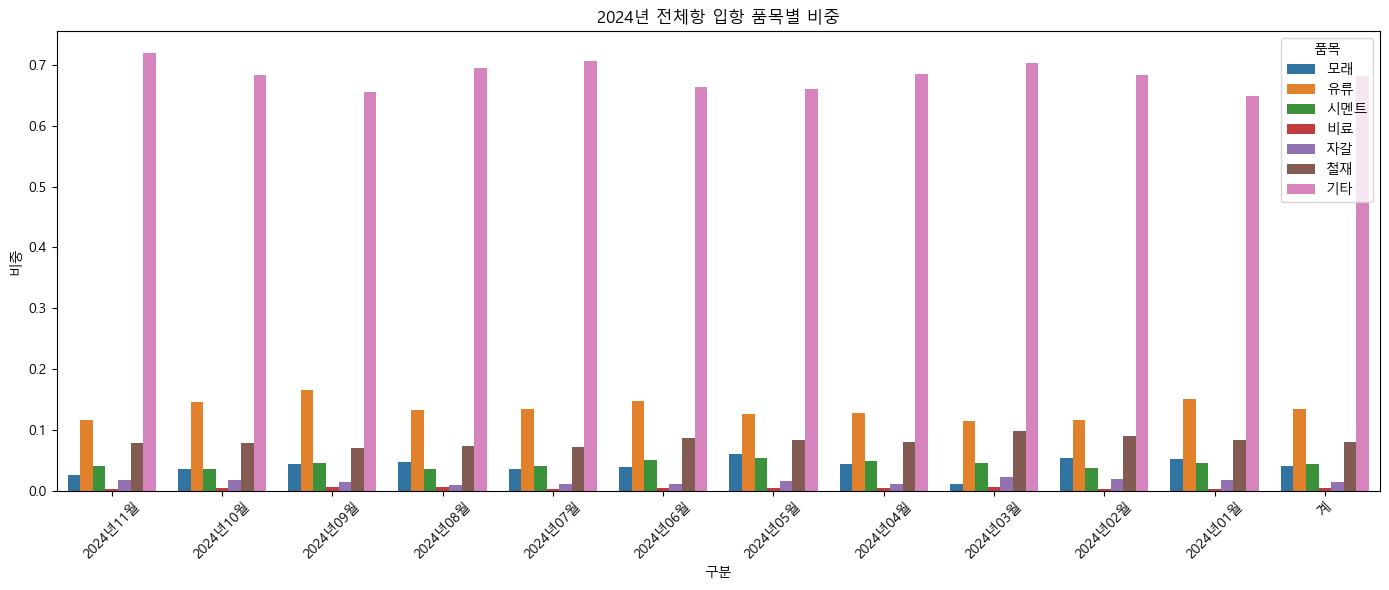

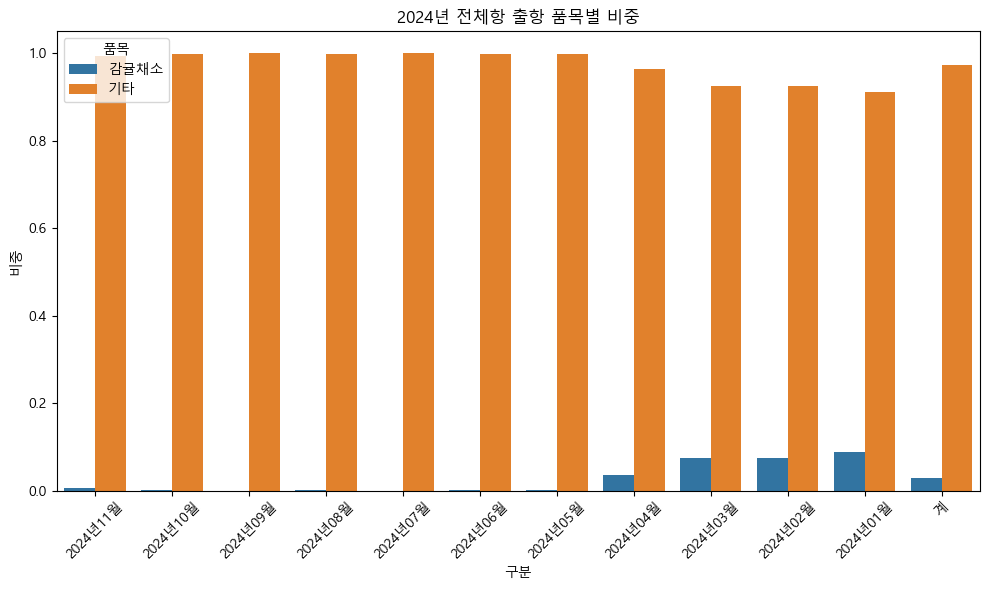

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

# ▶ 한글 폰트 설정 (Windows 사용자만 아래 주석 해제)
# matplotlib.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False

# ▶ 파일 경로
arrival_path = r"C:\Users\DAEJIN\Desktop\제주도의회 공모전\데이터\전체항 품목별 입항 데이터.xlsx"
departure_path = r"C:\Users\DAEJIN\Desktop\제주도의회 공모전\데이터\전체항 품목별 출항 데이터.xlsx"

# ▶ 엑셀 파일 불러오기
arr_raw = pd.read_excel(arrival_path, sheet_name=0, header=None)
dep_raw = pd.read_excel(departure_path, sheet_name=0, header=None)

# ✅ 실제 컬럼명은 3번째 행 (index=2)
arr_raw.columns = arr_raw.iloc[2].astype(str).str.strip()
dep_raw.columns = dep_raw.iloc[2].astype(str).str.strip()
arr_df = arr_raw.iloc[3:].reset_index(drop=True)
dep_df = dep_raw.iloc[3:].reset_index(drop=True)

# ▶ 사용할 컬럼
arrival_items = ['모래', '유류', '시멘트', '비료', '자갈', '철재', '기타']
departure_items = ['감귤채소', '기타']
arrival_cols = ['구분'] + [col for col in arrival_items if col in arr_df.columns]
departure_cols = ['구분'] + [col for col in departure_items if col in dep_df.columns]

# ▶ 필요한 컬럼만 추출
arr_df = arr_df[arrival_cols].copy()
dep_df = dep_df[departure_cols].copy()

# ▶ 숫자형으로 변환
for col in arrival_cols[1:]:
    arr_df[col] = pd.to_numeric(arr_df[col], errors='coerce')
for col in departure_cols[1:]:
    dep_df[col] = pd.to_numeric(dep_df[col], errors='coerce')

# ▶ 총합 계산
arr_df['합계'] = arr_df[arrival_cols[1:]].sum(axis=1)
dep_df['합계'] = dep_df[departure_cols[1:]].sum(axis=1)

# ▶ ① 입출항 총량 비교
plt.figure(figsize=(10,5))
plt.plot(arr_df['구분'], arr_df['합계'], label='입항 총량', marker='o')
plt.plot(dep_df['구분'], dep_df['합계'], label='출항 총량', marker='s')
plt.title('2024년 전체항 입출항 총량 비교')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

# ▶ ② 입항 품목별 비중
arr_ratio = arr_df.copy()
arr_ratio[arrival_cols[1:]] = arr_ratio[arrival_cols[1:]].div(arr_ratio[arrival_cols[1:]].sum(axis=1), axis=0)
arr_melt = arr_ratio.melt(id_vars='구분', value_vars=arrival_cols[1:], var_name='품목', value_name='비중')

plt.figure(figsize=(14, 6))
sns.barplot(data=arr_melt, x='구분', y='비중', hue='품목')
plt.title('2024년 전체항 입항 품목별 비중')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ▶ ③ 출항 품목별 비중
dep_ratio = dep_df.copy()
dep_ratio[departure_cols[1:]] = dep_ratio[departure_cols[1:]].div(dep_ratio[departure_cols[1:]].sum(axis=1), axis=0)
dep_melt = dep_ratio.melt(id_vars='구분', value_vars=departure_cols[1:], var_name='품목', value_name='비중')

plt.figure(figsize=(10, 6))
sns.barplot(data=dep_melt, x='구분', y='비중', hue='품목')
plt.title('2024년 전체항 출항 품목별 비중')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 1. 파일 경로 설정
# ▶ 파일 경로
arrival_path = r"C:\Users\DAEJIN\Desktop\제주도의회 공모전\데이터\전체항 품목별 입항 데이터.xlsx"
departure_path = r"C:\Users\DAEJIN\Desktop\제주도의회 공모전\데이터\전체항 품목별 출항 데이터.xlsx"

# 2. 데이터 불러오기 (3번째 행부터 데이터 시작)
arrival_df = pd.read_excel(arrival_path, header=2)
departure_df = pd.read_excel(departure_path, header=2)

# 3. 필요한 열만 추출 및 정리
arrival_df = arrival_df[['구분', '합계', '기타']].dropna()
departure_df = departure_df[['구분', '합계', '기타']].dropna()

# 4. 숫자형 변환 및 기타 비중 계산
arrival_df['합계'] = pd.to_numeric(arrival_df['합계'], errors='coerce')
arrival_df['기타'] = pd.to_numeric(arrival_df['기타'], errors='coerce')
arrival_df['기타비중(%)'] = (arrival_df['기타'] / arrival_df['합계']) * 100
arrival_df['구분구분'] = '입항'

departure_df['합계'] = pd.to_numeric(departure_df['합계'], errors='coerce')
departure_df['기타'] = pd.to_numeric(departure_df['기타'], errors='coerce')
departure_df['기타비중(%)'] = (departure_df['기타'] / departure_df['합계']) * 100
departure_df['구분구분'] = '출항'

# 5. 정렬을 위한 키 생성
arrival_month_parts = arrival_df['구분'].str.extract(r'(\d+)년\s*(\d+)월').dropna()
arrival_month_key = arrival_month_parts.apply(lambda x: int(x[0]) * 100 + int(x[1]), axis=1)
arrival_df = arrival_df.loc[arrival_month_key.index]
arrival_df['정렬키'] = arrival_month_key

departure_month_parts = departure_df['구분'].str.extract(r'(\d+)년\s*(\d+)월').dropna()
departure_month_key = departure_month_parts.apply(lambda x: int(x[0]) * 100 + int(x[1]), axis=1)
departure_df = departure_df.loc[departure_month_key.index]
departure_df['정렬키'] = departure_month_key

# 6. 월 오름차순 정렬
arrival_df.sort_values(by='정렬키', inplace=True)
departure_df.sort_values(by='정렬키', inplace=True)

# 7. 숫자 포맷: 천단위 콤마, 소수점 첫째자리
arrival_df['합계'] = arrival_df['합계'].astype(int).apply(lambda x: f"{x:,}")
arrival_df['기타'] = arrival_df['기타'].astype(int).apply(lambda x: f"{x:,}")
arrival_df['기타비중(%)'] = arrival_df['기타비중(%)'].map(lambda x: f"{x:.1f}")

departure_df['합계'] = departure_df['합계'].astype(int).apply(lambda x: f"{x:,}")
departure_df['기타'] = departure_df['기타'].astype(int).apply(lambda x: f"{x:,}")
departure_df['기타비중(%)'] = departure_df['기타비중(%)'].map(lambda x: f"{x:.1f}")

# 8. 컬럼 이름 정리 및 최종 출력
arrival_df.rename(columns={'구분': '월', '구분구분': '구분'}, inplace=True)
departure_df.rename(columns={'구분': '월', '구분구분': '구분'}, inplace=True)

arrival_final = arrival_df[['구분', '월', '합계', '기타', '기타비중(%)']].reset_index(drop=True)
departure_final = departure_df[['구분', '월', '합계', '기타', '기타비중(%)']].reset_index(drop=True)

# 결과 출력
print("✅ 입항 요약표")
print(arrival_final)

print("\n✅ 출항 요약표")
print(departure_final)


✅ 입항 요약표
    구분         월         합계       기타 기타비중(%)
0   입항  2024년01월  1,207,831  784,615    65.0
1   입항  2024년02월  1,009,344  689,698    68.3
2   입항  2024년03월  1,085,686  764,140    70.4
3   입항  2024년04월  1,096,869  751,306    68.5
4   입항  2024년05월  1,141,762  753,762    66.0
5   입항  2024년06월  1,112,454  737,604    66.3
6   입항  2024년07월  1,302,357  918,988    70.6
7   입항  2024년08월  1,235,777  858,487    69.5
8   입항  2024년09월  1,134,893  744,441    65.6
9   입항  2024년10월  1,255,067  858,679    68.4
10  입항  2024년11월  1,117,756  803,909    71.9

✅ 출항 요약표
    구분         월       합계       기타 기타비중(%)
0   출항  2024년01월  995,563  908,154    91.2
1   출항  2024년02월  819,480  757,710    92.5
2   출항  2024년03월  892,006  825,015    92.5
3   출항  2024년04월  830,242  799,929    96.3
4   출항  2024년05월  769,507  768,237    99.8
5   출항  2024년06월  729,651  728,851    99.9
6   출항  2024년07월  712,838  712,838   100.0
7   출항  2024년08월  899,858  899,058    99.9
8   출항  2024년09월  765,707  765,707   100.0
9   출항  202

<Figure size 1400x600 with 0 Axes>

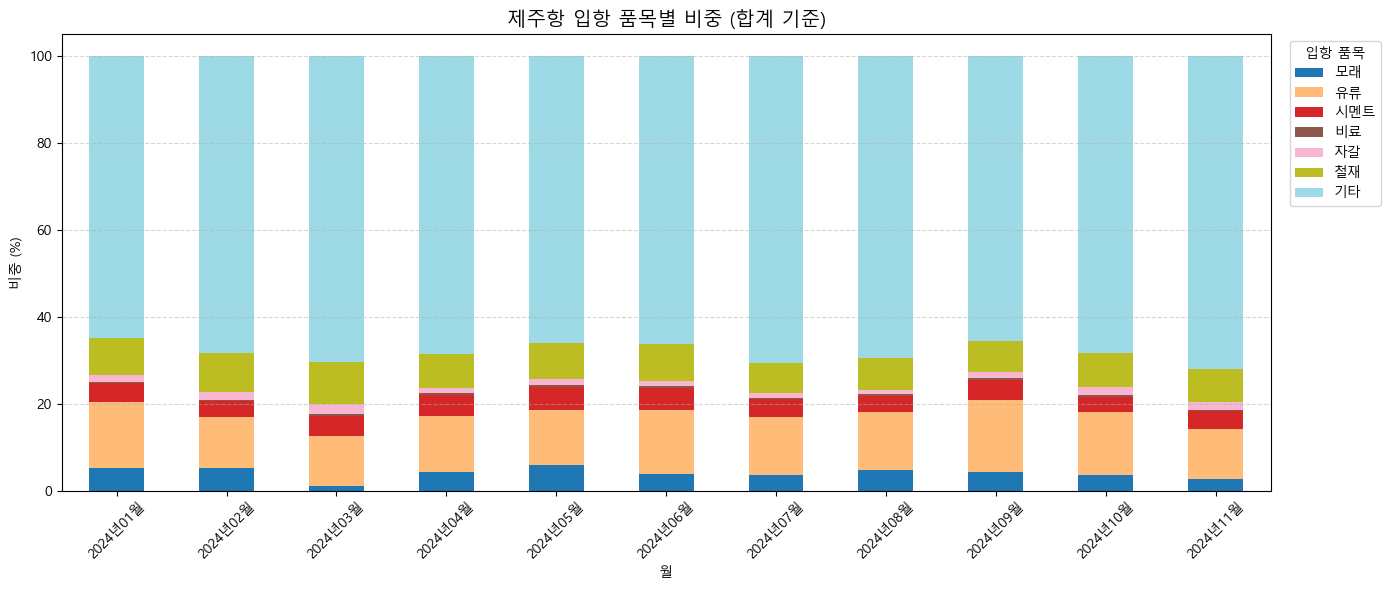

<Figure size 1000x500 with 0 Axes>

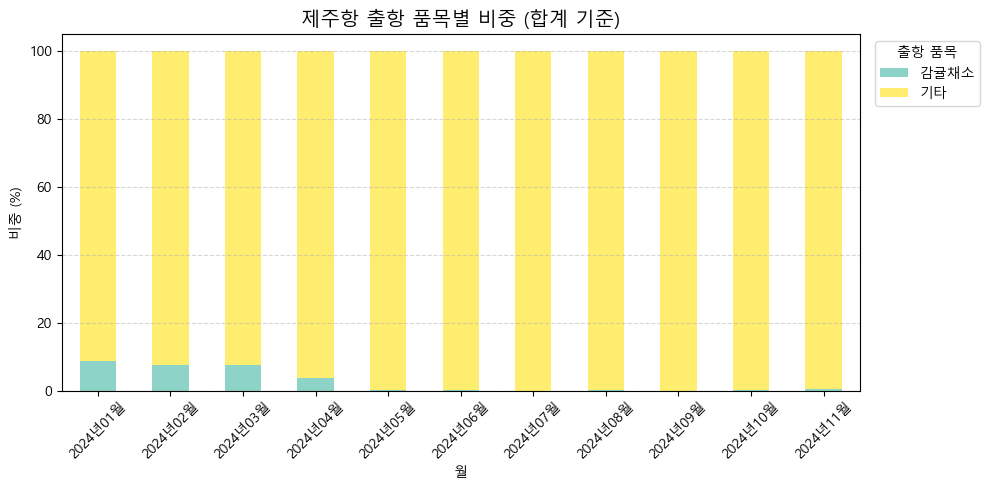

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ▶ 파일 경로
arrival_path = r"C:\Users\DAEJIN\Desktop\제주도의회 공모전\데이터\전체항 품목별 입항 데이터.xlsx"
departure_path = r"C:\Users\DAEJIN\Desktop\제주도의회 공모전\데이터\전체항 품목별 출항 데이터.xlsx"

# ▶ 데이터 불러오기 (3번째 줄부터 시작)
arrival_df = pd.read_excel(arrival_path, header=2)
departure_df = pd.read_excel(departure_path, header=2)

# ▶ 사용할 컬럼 지정
arrival_cols = ['구분', '합계', '모래', '유류', '시멘트', '비료', '자갈', '철재', '기타']
departure_cols = ['구분', '합계', '감귤채소', '기타']

# ▶ 필요한 열 추출 및 NaN 제거
arrival_df = arrival_df[arrival_cols].dropna()
departure_df = departure_df[departure_cols].dropna()

# ▶ 숫자형으로 변환
for col in arrival_cols[1:]:
    arrival_df[col] = pd.to_numeric(arrival_df[col], errors='coerce')
for col in departure_cols[1:]:
    departure_df[col] = pd.to_numeric(departure_df[col], errors='coerce')

# ▶ 정렬 키 생성 (NaN 처리 포함)
arrival_month = arrival_df['구분'].str.extract(r'(\d+)년\s*(\d+)월').dropna()
arrival_df = arrival_df.loc[arrival_month.index]
arrival_df['정렬키'] = arrival_month.apply(lambda x: int(x[0]) * 100 + int(x[1]), axis=1)

departure_month = departure_df['구분'].str.extract(r'(\d+)년\s*(\d+)월').dropna()
departure_df = departure_df.loc[departure_month.index]
departure_df['정렬키'] = departure_month.apply(lambda x: int(x[0]) * 100 + int(x[1]), axis=1)

# ▶ 정렬
arrival_df = arrival_df.sort_values('정렬키')
departure_df = departure_df.sort_values('정렬키')

# ▶ 비중 계산 (각 품목 / 합계 * 100)
arrival_plot = arrival_df.copy()
departure_plot = departure_df.copy()

for col in arrival_cols[2:]:  # 모래~기타
    arrival_plot[col] = (arrival_plot[col] / arrival_plot['합계']) * 100
for col in departure_cols[2:]:  # 감귤채소, 기타
    departure_plot[col] = (departure_plot[col] / departure_plot['합계']) * 100

# ▶ 인덱스 설정
arrival_plot.set_index('구분', inplace=True)
departure_plot.set_index('구분', inplace=True)

# ▶ 입항 시각화
plt.figure(figsize=(14, 6))
arrival_plot[arrival_cols[2:]].plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 6))
plt.title("제주항 입항 품목별 비중 (합계 기준)", fontsize=14)
plt.ylabel("비중 (%)")
plt.xlabel("월")
plt.xticks(rotation=45)
plt.legend(title="입항 품목", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

# ▶ 출항 시각화
plt.figure(figsize=(10, 5))
departure_plot[departure_cols[2:]].plot(kind='bar', stacked=True, colormap='Set3', figsize=(10, 5))
plt.title("제주항 출항 품목별 비중 (합계 기준)", fontsize=14)
plt.ylabel("비중 (%)")
plt.xlabel("월")
plt.xticks(rotation=45)
plt.legend(title="출항 품목", bbox_to_anchor=(1.01, 1), loc='upper left')
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()


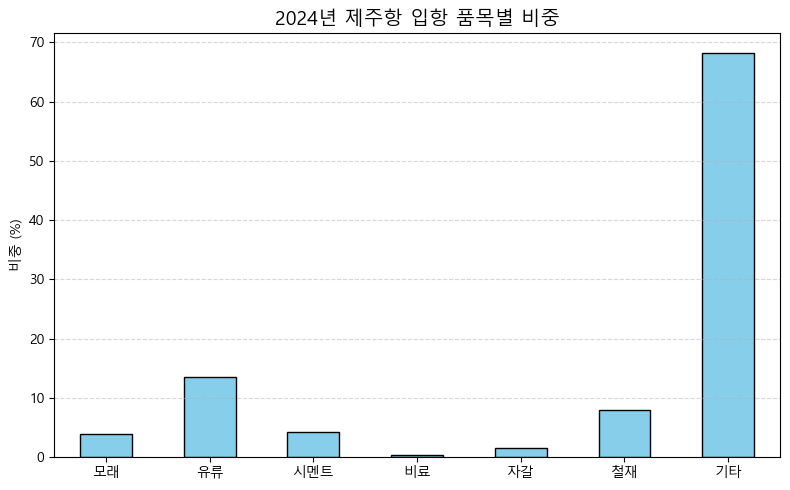

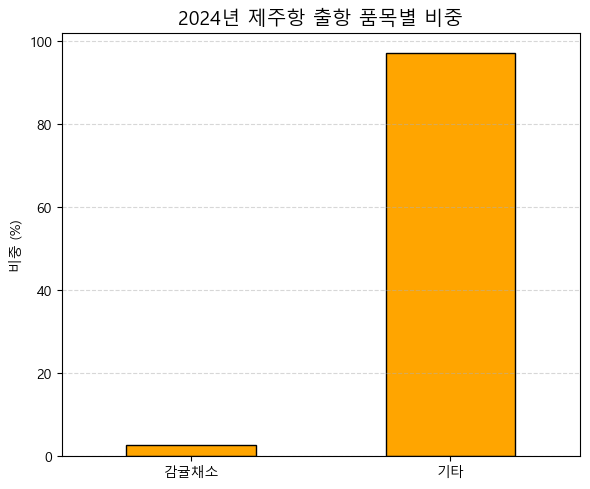

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ▶ 파일 경로
arrival_path = r"C:\Users\DAEJIN\Desktop\제주도의회 공모전\데이터\전체항 품목별 입항 데이터.xlsx"
departure_path = r"C:\Users\DAEJIN\Desktop\제주도의회 공모전\데이터\전체항 품목별 출항 데이터.xlsx"

# ▶ 데이터 불러오기
arrival_df = pd.read_excel(arrival_path, header=2)
departure_df = pd.read_excel(departure_path, header=2)

# ▶ 컬럼 지정
arrival_cols = ['구분', '합계', '모래', '유류', '시멘트', '비료', '자갈', '철재', '기타']
departure_cols = ['구분', '합계', '감귤채소', '기타']
arrival_df = arrival_df[arrival_cols].dropna()
departure_df = departure_df[departure_cols].dropna()

# ▶ 숫자형 변환
for col in arrival_cols[1:]:
    arrival_df[col] = pd.to_numeric(arrival_df[col], errors='coerce')
for col in departure_cols[1:]:
    departure_df[col] = pd.to_numeric(departure_df[col], errors='coerce')

# ▶ 2024년 1월~11월 필터링
arrival_df = arrival_df[arrival_df['구분'].str.contains("2024년") & ~arrival_df['구분'].str.contains("12월")]
departure_df = departure_df[departure_df['구분'].str.contains("2024년") & ~departure_df['구분'].str.contains("12월")]

# ▶ 누적합 및 비중 계산
arrival_total = arrival_df['합계'].sum()
departure_total = departure_df['합계'].sum()
arrival_sum = arrival_df[arrival_cols[2:]].sum()
departure_sum = departure_df[departure_cols[2:]].sum()
arrival_ratio = (arrival_sum / arrival_total * 100).round(1)
departure_ratio = (departure_sum / departure_total * 100).round(1)

# ▶ 입항 그래프
plt.figure(figsize=(8, 5))
arrival_ratio.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("2024년 제주지역 전체 항만 입항 품목별 비중", fontsize=14)
plt.ylabel("비중 (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# ▶ 출항 그래프
plt.figure(figsize=(6, 5))
departure_ratio.plot(kind='bar', color='orange', edgecolor='black')
plt.title("2024년 제주항 출항 품목별 비중", fontsize=14)
plt.ylabel("비중 (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


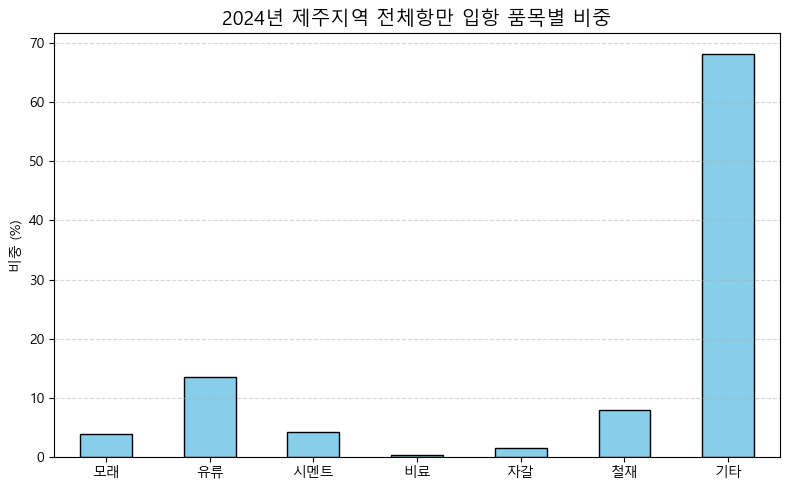

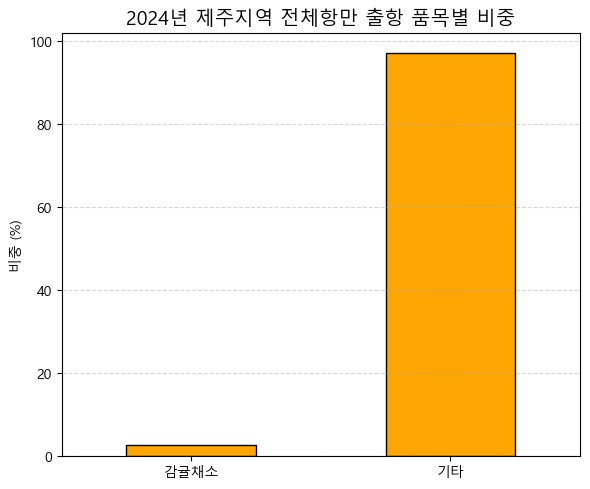

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ▶ 파일 경로
arrival_path = r"C:\Users\DAEJIN\Desktop\제주도의회 공모전\데이터\전체항 품목별 입항 데이터.xlsx"
departure_path = r"C:\Users\DAEJIN\Desktop\제주도의회 공모전\데이터\전체항 품목별 출항 데이터.xlsx"

# ▶ 저장 경로
save_path_desktop = r"C:\Users\DAEJIN\Desktop"

# ▶ 데이터 불러오기
arrival_df = pd.read_excel(arrival_path, header=2)
departure_df = pd.read_excel(departure_path, header=2)

# ▶ 컬럼 지정
arrival_cols = ['구분', '합계', '모래', '유류', '시멘트', '비료', '자갈', '철재', '기타']
departure_cols = ['구분', '합계', '감귤채소', '기타']
arrival_df = arrival_df[arrival_cols].dropna()
departure_df = departure_df[departure_cols].dropna()

# ▶ 숫자형 변환
for col in arrival_cols[1:]:
    arrival_df[col] = pd.to_numeric(arrival_df[col], errors='coerce')
for col in departure_cols[1:]:
    departure_df[col] = pd.to_numeric(departure_df[col], errors='coerce')

# ▶ 2024년 1~11월 필터링
arrival_df = arrival_df[arrival_df['구분'].str.contains("2024년") & ~arrival_df['구분'].str.contains("12월")]
departure_df = departure_df[departure_df['구분'].str.contains("2024년") & ~departure_df['구분'].str.contains("12월")]

# ▶ 누적합 및 비중 계산
arrival_total = arrival_df['합계'].sum()
departure_total = departure_df['합계'].sum()
arrival_sum = arrival_df[arrival_cols[2:]].sum()
departure_sum = departure_df[departure_cols[2:]].sum()
arrival_ratio = (arrival_sum / arrival_total * 100).round(1)
departure_ratio = (departure_sum / departure_total * 100).round(1)

# ▶ 입항 그래프
plt.figure(figsize=(8, 5))
arrival_ratio.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title("2024년 제주지역 전체항만 입항 품목별 비중", fontsize=14)
plt.ylabel("비중 (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(f"{save_path_desktop}\\제주항_입항_품목별_비중.png", dpi=300)
plt.show()

# ▶ 출항 그래프
plt.figure(figsize=(6, 5))
departure_ratio.plot(kind='bar', color='orange', edgecolor='black')
plt.title("2024년 제주지역 전체항만 출항 품목별 비중", fontsize=14)
plt.ylabel("비중 (%)")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig(f"{save_path_desktop}\\제주항_출항_품목별_비중.png", dpi=300)
plt.show()


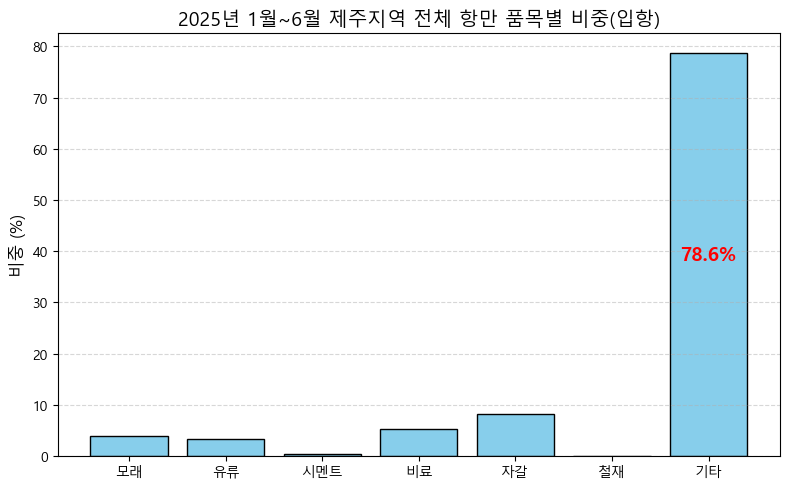

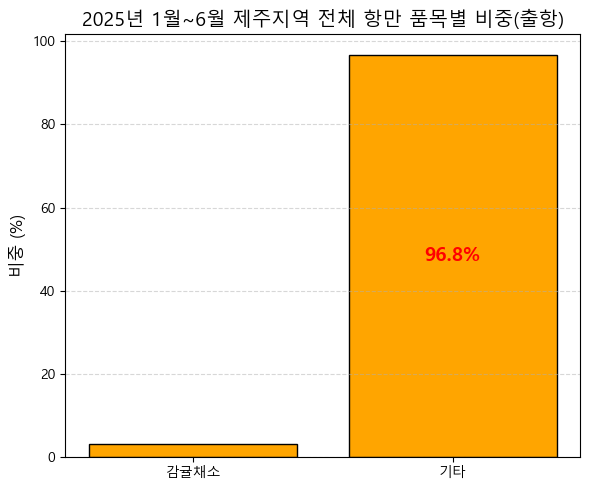

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# ▶ 파일 경로
arrival_path = r"C:\Users\DAEJIN\Desktop\제주도의회 공모전\데이터\전체항 품목별 입항 데이터.xlsx"
departure_path = r"C:\Users\DAEJIN\Desktop\제주도의회 공모전\데이터\전체항 품목별 출항 데이터.xlsx"
save_path_desktop = r"C:\Users\DAEJIN\Desktop"

# ▶ 데이터 불러오기
arrival_df = pd.read_excel(arrival_path, header=2)
departure_df = pd.read_excel(departure_path, header=2)

# ▶ 컬럼 지정
arrival_cols = ['구분', '합계', '모래', '유류', '시멘트', '비료', '자갈', '철재', '기타']
departure_cols = ['구분', '합계', '감귤채소', '기타']
arrival_df = arrival_df[arrival_cols].dropna()
departure_df = departure_df[departure_cols].dropna()

# ▶ 숫자형 변환
for col in arrival_cols[1:]:
    arrival_df[col] = pd.to_numeric(arrival_df[col], errors='coerce')
for col in departure_cols[1:]:
    departure_df[col] = pd.to_numeric(departure_df[col], errors='coerce')

# ▶ 2024년 1~11월 필터링
arrival_df = arrival_df[arrival_df['구분'].str.contains("2025년") & ~arrival_df['구분'].str.contains("6월")]
departure_df = departure_df[departure_df['구분'].str.contains("2025년") & ~departure_df['구분'].str.contains("6월")]

# ▶ 누적합 및 비중 계산
arrival_total = arrival_df['합계'].sum()
departure_total = departure_df['합계'].sum()
arrival_sum = arrival_df[arrival_cols[2:]].sum()
departure_sum = departure_df[departure_cols[2:]].sum()
arrival_ratio = (arrival_sum / arrival_total * 100).round(1)
departure_ratio = (departure_sum / departure_total * 100).round(1)

# ▶ 입항 그래프
plt.figure(figsize=(8, 5))
bars = plt.bar(arrival_ratio.index, arrival_ratio.values, color='skyblue', edgecolor='black')
plt.title("2025년 1월~6월 제주지역 전체 항만 품목별 비중(입항)", fontsize=14)
plt.ylabel("비중 (%)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# ▶ 기타 막대 내부에 수치 표시
if '기타' in arrival_ratio.index:
    idx = list(arrival_ratio.index).index('기타')
    height = bars[idx].get_height()
    plt.text(
        bars[idx].get_x() + bars[idx].get_width() / 2, height * 0.5,
        f"{height:.1f}%", ha='center', va='center',
        fontsize=14, fontweight='bold', color='red'
    )

plt.savefig(f"{save_path_desktop}\\제주항_입항_품목별_비중.png", dpi=300)
plt.show()

# ▶ 출항 그래프
plt.figure(figsize=(6, 5))
bars = plt.bar(departure_ratio.index, departure_ratio.values, color='orange', edgecolor='black')
plt.title("2025년 1월~6월 제주지역 전체 항만 품목별 비중(출항)", fontsize=14)
plt.ylabel("비중 (%)", fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()

# ▶ 기타 막대 내부에 수치 표시
if '기타' in departure_ratio.index:
    idx = list(departure_ratio.index).index('기타')
    height = bars[idx].get_height()
    plt.text(
        bars[idx].get_x() + bars[idx].get_width() / 2, height * 0.5,
        f"{height:.1f}%", ha='center', va='center',
        fontsize=14, fontweight='bold', color='red'
    )

plt.savefig(f"{save_path_desktop}\\제주항_출항_품목별_비중.png", dpi=300)
plt.show()
